In [368]:
import numpy as np
import pandas as pd
from os import path
import sys
sys.path.append('./')
from create_metrics import read_data,knn_metric,similarity_metric

In [369]:
# Read data sample1.csv
from sklearn import preprocessing
def read_data(path=''):
    df = pd.read_csv(path)
    df = df[['x','y']]    
    # print(df)
    np_array = df.to_numpy(dtype=float)
    np_array = preprocessing.MinMaxScaler().fit_transform(np_array)
    return np_array

np_array= read_data('../sample2.csv')

np_array

array([[0.13989678, 0.60027175],
       [0.23813266, 0.36542533],
       [0.12286145, 0.23686741],
       ...,
       [0.80250074, 0.72741914],
       [0.83483586, 0.5855547 ],
       [0.80566277, 0.19389512]])

In [370]:

# Create distance matrix
distance_metric = similarity_metric.Euclidean_similarity_metric(np_array)
distance_metric

array([[0.        , 0.25456459, 0.3638034 , ..., 0.67469287, 0.6950949 ,
        0.77999123],
       [0.25456459, 0.        , 0.17266902, ..., 0.67048553, 0.6360123 ,
        0.59288535],
       [0.3638034 , 0.17266902, 0.        , ..., 0.83818289, 0.79277386,
        0.68415222],
       ...,
       [0.67469287, 0.67048553, 0.83818289, ..., 0.        , 0.14550285,
        0.53353339],
       [0.6950949 , 0.6360123 , 0.79277386, ..., 0.14550285, 0.        ,
        0.39274457],
       [0.77999123, 0.59288535, 0.68415222, ..., 0.53353339, 0.39274457,
        0.        ]])

In [371]:
# Create similarity matrix
similarity_metrix = np.zeros((len(distance_metric),len(distance_metric)))
for i in range(0,len(distance_metric)):
    for j in range(0,len(distance_metric)):
        similarity_metrix[i][j] = 1/(1+distance_metric[i][j])
        
similarity_metrix

array([[1.        , 0.79708929, 0.73324351, ..., 0.59712441, 0.58993747,
        0.56180052],
       [0.79708929, 1.        , 0.85275554, ..., 0.59862835, 0.61124235,
        0.62779158],
       [0.73324351, 0.85275554, 1.        , ..., 0.54401551, 0.55779484,
        0.59377056],
       ...,
       [0.59712441, 0.59862835, 0.54401551, ..., 1.        , 0.87297906,
        0.65208883],
       [0.58993747, 0.61124235, 0.55779484, ..., 0.87297906, 1.        ,
        0.71800675],
       [0.56180052, 0.62779158, 0.59377056, ..., 0.65208883, 0.71800675,
        1.        ]])

In [420]:
# Create K- nearest neighbor:
from create_metrics import knn_metric

knn_result = knn_metric.Knn_metric(similarity_metrix,k=5)
knn_result

array([[ 282,  136,  805,  149,  566],
       [ 222,  559, 1447,  345,  739],
       [ 138,  484,  882,  204,   68],
       ...,
       [3107, 3523, 3987, 3544, 3091],
       [3204, 3913, 3590, 3907, 3512],
       [3617, 3630, 3540, 3227, 3723]])

In [421]:
knn_result.shape

(4000, 5)

In [422]:
# Create Graph

from graph_partitioning import create_Graphnetworkx
graph = create_Graphnetworkx.Graph(knn_result)
G = graph.createGraphFromAjacentList()
print(G)

Graph with 4000 nodes and 11942 edges


In [423]:
# Partitioning using Metis
from graph_partitioning import metis_algorithm,create_subgraph
n_cuts,membership = metis_algorithm.partitionGraph(G,nparts=50,recursive=True)
# print(membership)
print(n_cuts)

704


['#4F77DB', '#4CA8D7', '#17D6CD', '#9E4B9C', '#46128B', '#36CEE4', '#1748F0', '#4F0DD8', '#DFBBCC', '#6530BE', '#BFED82', '#8B9ACD', '#98CD1E', '#DD9871', '#5C9C32', '#56080B', '#1D1564', '#260341', '#31EC27', '#F4E678', '#AFD58E', '#89C6DE', '#ED7F22', '#7217E3', '#B34FF3', '#325E05', '#621F83', '#A5F91B', '#23327F', '#CB0963', '#454CEC', '#7046D5', '#670D6A', '#B75AF4', '#A75623', '#9ADE8B', '#4042BC', '#3DACA6', '#DB2E9C', '#56FDD1', '#93C9B4', '#2DBE15', '#A06305', '#F6BA11', '#AB00F3', '#BB3A94', '#D8CD0B', '#F7A3D7', '#9CEEDC', '#C312A2']


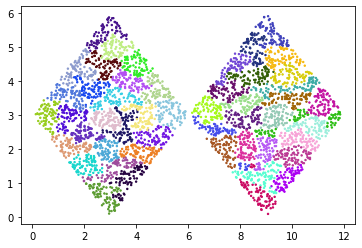

In [424]:
from graph_partitioning import create_subgraph
import networkx as nx
import matplotlib.pyplot as plt
color_map = create_subgraph.make_colorMap(G,membership)
print(create_subgraph.unique(color_map))
# print(color_map)

df= pd.read_csv('../sample2.csv')
df = df[['x','y']]
df
plt.scatter(df['x'],df['y'],c=color_map,s=2)
# nx.draw(G,with_labels=False,node_color=color_map,node_shape="s",node_size=10)
plt.show()

In [425]:
# from graph_partitioning import create_subgraph

# subgraphs = create_subgraph.make_subgraphs(G,membership=membership)
# for g in subgraphs:
#     print(g)

In [426]:
from typing import List

def new_subgraphs(G:nx.Graph,membership:list,knn_result:np.array):
    graphs_label = set(membership)
    list_subgraphs = [None]*len(graphs_label)
    for sub_id in graphs_label:
        temp = nx.Graph()
        for i in range (0,len(membership)):
            if (sub_id == membership[i]):
                temp.add_node(i)
        # for 
    return graphs_label

a = new_subgraphs(G,membership,knn_result)
print(a)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}


In [427]:
components = nx.connected_components(G)
from graph_partitioning import create_subgraph
print(G)
G1 = create_subgraph.removeEdges(G,membership)
# print(G)

# components = nx.connected_components(G)
# tmp_graphs = [None]*200
# for n in components:
#     print(n)

# for g in tmp_graphs:
#     print(g)
S = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]
for g in S:
    print(g)

Graph with 4000 nodes and 11942 edges
Edges removed:  704
Graph with 78 nodes and 219 edges
Graph with 80 nodes and 222 edges
Graph with 80 nodes and 223 edges
Graph with 80 nodes and 210 edges
Graph with 80 nodes and 227 edges
Graph with 81 nodes and 226 edges
Graph with 80 nodes and 212 edges
Graph with 81 nodes and 226 edges
Graph with 80 nodes and 224 edges
Graph with 80 nodes and 232 edges
Graph with 80 nodes and 225 edges
Graph with 79 nodes and 226 edges
Graph with 81 nodes and 235 edges
Graph with 80 nodes and 227 edges
Graph with 81 nodes and 237 edges
Graph with 80 nodes and 225 edges
Graph with 80 nodes and 204 edges
Graph with 79 nodes and 224 edges
Graph with 80 nodes and 228 edges
Graph with 80 nodes and 217 edges
Graph with 80 nodes and 231 edges
Graph with 81 nodes and 229 edges
Graph with 81 nodes and 224 edges
Graph with 79 nodes and 220 edges
Graph with 79 nodes and 219 edges
Graph with 81 nodes and 228 edges
Graph with 80 nodes and 221 edges
Graph with 81 nodes and 

<p>Now consider each subgraph is a sub cluster, make a membership list as follow </p>

In [428]:
memb = [0]* G.number_of_nodes()
l = len(S)
start = 0
for g in S:
    for node in g.nodes():
        memb[node] = start
    start = start + 1

# print(memb)

['#D15F0A', '#892CB5', '#E90CDF', '#EAE90D', '#B3A5F0', '#CB2EC6', '#BE861D', '#CA81B7', '#0EC5E9', '#D5169F', '#182D6B', '#CB0DA5', '#8EAAD7', '#6DFF92', '#7AC91D', '#22C3C9', '#6350EF', '#20CB5A', '#2AFD3C', '#7EF946', '#61FB45', '#13C252', '#4ABB64', '#20FA0E', '#1CBE60', '#2BE412', '#FCC926', '#6BA63E', '#F4BBA1', '#095227', '#8E7C09', '#96E80F', '#DFA3ED', '#5406BE', '#72CE17', '#AB728F', '#DFF1A4', '#A203E9', '#2CEA4E', '#6ED9E9', '#B2C07C', '#4915EE', '#43100A', '#F58684', '#427C82', '#537266', '#ADD71E', '#638D69', '#D1F023', '#E24B46', '#B39B12', '#5FE8F6', '#45496F', '#B843D8']


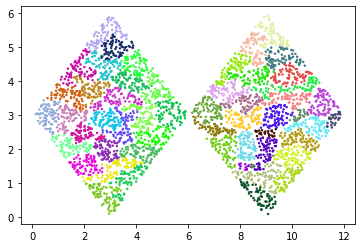

In [429]:
color_map = create_subgraph.make_colorMap(G,memb)
print(create_subgraph.unique(color_map))
# print(color_map)

df= pd.read_csv('../sample2.csv')
df = df[['x','y']]
df
plt.scatter(df['x'],df['y'],c=color_map,s=2)
# nx.draw(G,with_labels=False,node_color=color_map,node_shape="s",node_size=10)
plt.show()

<p>Calculate self-similarity between cluster</p>

In [430]:
from merge_partitions import relative_closeness,relative_interconnectivity,self_similarity

def validation(G:nx.Graph(),subgraphs:list,sub_g1: nx.Graph(),sub_g2: nx.Graph(),membership:list):
    ri = relative_interconnectivity.RI(G,subgraphs,sub_g1,sub_g2,membership)
    rc = relative_closeness.RC(G,subgraphs,sub_g1,sub_g2,membership)
    score = self_similarity.get_selfsimilarity(rc,ri,2)
    # print(score)
    return score

i = 0
j = 0
np_similarity = np.zeros((len(S),len(S)))
for i in range (0,len(S)):
    for j in range(i+1,len(S)):
        np_similarity[i][j] = validation(G,S,S[i],S[j],memb)
        np_similarity[j][i] = np_similarity[i][j]
        # print(i,j,':', sc)

np_similarity



array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.03883085,
        0.08791437],
       [0.        , 0.        , 0.        , ..., 0.03883085, 0.        ,
        0.02814649],
       [0.        , 0.        , 0.        , ..., 0.08791437, 0.02814649,
        0.        ]])

In [431]:
def get_2most_similarity_clusters(nparray:np.array):
    x = 0
    y = 0
    number_of_clusters = len(nparray)
    # print(number_of_clusters)
    maxindex = nparray.argmax()
    x = int(maxindex/number_of_clusters)
    y = maxindex - x*number_of_clusters
    return x,y


# maxindex = np_similarity.argmax()
# maxindex
# print(np.amax(np_similarity))
# np_similarity[52][55]

In [438]:
# Merge 2 similarity cluster until have 5 clusters
from merge_partitions import merge_graphs
while(len(S)>2):
    x,y = get_2most_similarity_clusters(np_similarity)
    print(x,y,np_similarity[x][y])
    id1 = x
    id2 = y
    if (np_similarity[x][y]>0):
        G1 = merge_graphs.merge_subgraphs(G,G1,id1,id2,membership=memb)
    else:
        break
    S = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]

    # new labels
    memb = [0]* G.number_of_nodes()
    l = len(S)
    start = 0
    for g in S:
        for node in g.nodes():
            memb[node] = start
        start = start + 1

    print('Len S: ',len(S))
    # New self-similarity
    i = 0
    j = 0
    np_similarity = np.zeros((len(S),len(S)))
    for i in range (0,len(S)):
        for j in range(i+1,len(S)):
            np_similarity[i][j] = validation(G,S,S[i],S[j],memb)
            np_similarity[j][i] = np_similarity[i][j]
    print(G1)

4 5 0.016148148148148148
Len S:  5
Graph with 4000 nodes and 11622 edges
2 4 0.05290965950580511
Len S:  4
Graph with 4000 nodes and 11629 edges
1 2 0.037088228518774476
Len S:  3
Graph with 4000 nodes and 11636 edges
1 2 0.1531762608507954
Len S:  2
Graph with 4000 nodes and 11644 edges


In [439]:
S = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]
for g in S:
    print(g)

Graph with 2000 nodes and 5796 edges
Graph with 2000 nodes and 5848 edges


['#C59037', '#352FF5']


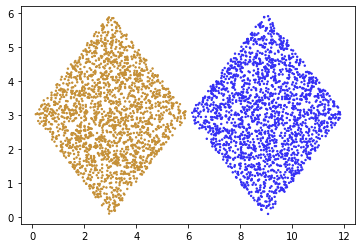

In [440]:
memb= [0]* G1.number_of_nodes()
l = len(S)
start = 0
for g in S:
    for node in g.nodes():
        memb[node] = start
    start = start + 1
color_map = create_subgraph.make_colorMap(G,memb)
print(create_subgraph.unique(color_map))
# print(color_map)

df= pd.read_csv('../sample2.csv')
df = df[['x','y']]
df
plt.scatter(df['x'],df['y'],c=color_map,s=2)
# nx.draw(G,with_labels=False,node_color=color_map,node_shape="s",node_size=10)
plt.show()